<a href="https://colab.research.google.com/github/Bahaakhalled/Bahaakhalled.github.io/blob/main/Machinfy_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [250]:
data=pd.read_csv('Text_Similarity_Dataset.csv')
data.head(1)
copydata=data.copy()

In [251]:
data.shape

(4023, 3)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Unique_ID  4023 non-null   int64 
 1   text1      4023 non-null   object
 2   text2      4023 non-null   object
dtypes: int64(1), object(2)
memory usage: 94.4+ KB


In [253]:
temp=data[data.duplicated()]
temp

,Unique_ID,text1,text2


In [254]:
text1=data['text1']
for i in text1:
  temp=i.split()
  #print(max(temp, key=len))

Method above showed how big words are and that it is needed to remove - and / from the strings to seperate the words

Removed all symbols
---



In [255]:
pattern = r'[' + string.punctuation + ']'
copydata['text1']=data['text1'].map(lambda m:re.sub(pattern," ",m))
copydata['text2']=data['text2'].map(lambda m:re.sub(pattern," ",m))

In [256]:
def biggestword(column,method):
  templst=list()
  for i in column:
    temp=i.split()
    templst.append(method(temp, key=len))
  return(method(templst, key=len))

In [257]:
print(biggestword(copydata['text1'],max))
print(biggestword(copydata['text2'],max))
print(biggestword(copydata['text1'],min))
print(biggestword(copydata['text2'],min))

southernplayalisticadillacmuzik
southernplayalisticadillacmuzik
a
2


In [258]:
copydata.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2 1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40 o...,nasdaq planning 100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen year ...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket sized devices ...


Lower Casing

In [259]:
copydata['text1']=copydata['text1'].map(lambda m:m.lower())
copydata['text2']=copydata['text2'].map(lambda m:m.lower())

In [260]:
copydata1=copydata.copy()

Remove Stop Words like the you our etc


In [261]:
#Token Function
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens
#applying function to the column
copydata1['text1']= copydata['text1'].apply(lambda x: tokenization(x))
copydata1['text2']= copydata['text2'].apply(lambda x: tokenization(x))

In [262]:
#Length Function to get Length Difference after each change
def length(item):
  counter=0
  for x in item:
    counter+=len(x)
  return(counter)
before=length(copydata1['text1'])
print('# of Words before removing Stop Words: ' + str(length(copydata1['text1'])))

# of Words before removing Stop Words: 1812132


In [263]:
sw=nltk.corpus.stopwords.words('english')
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [264]:
copytemp1=copydata1['text1'].apply(lambda x: [item for item in x if item not in sw])
copytemp2=copydata1['text2'].apply(lambda x: [item for item in x if item not in sw])

Removing Numbers

In [265]:
copydata1['text1']=copytemp1
copydata1['text2']=copytemp2
copytemp1=copydata1['text1'].apply(lambda x: [item for item in x if not item.isdigit()])
copytemp2=copydata1['text2'].apply(lambda x: [item for item in x if not item.isdigit()])
#removingdigits()

In [266]:
#Checking for Stop Words and numbers
for sent in copytemp1:
  for word in sent:
    if word in sw or word.isdigit():
      print(word)

In [267]:
copydata1['text1']=copytemp1
copydata1['text2']=copytemp2
after=length(copydata1['text1'])
print('# of Words after removing Stop Words: ' + str(length(copydata1['text1'])))

# of Words after removing Stop Words: 1110646


In [268]:
print(str(before-after) + ' Stop words and numbers removed')

701486 Stop words and numbers removed


Apply Lemmatization

In [269]:
lemmatizer = WordNetLemmatizer()

Before Lemmatization

---



---


(random word chosen that requires lemmatization)

In [270]:
copydata1['text1'][0][1]

'searchers'

In [271]:
copydata1['text1']=copydata1['text1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
copydata1['text2']=copydata1['text2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

After Lemmatization

In [272]:
copydata1['text1'][0][1]

'searcher'

Removed Empty Tokens from lists Below

In [273]:
length(copydata1['text1'])

1110646

In [274]:
copydata1['text1']=copydata1['text1'].apply(lambda x: [item for item in x if item !=''])
copydata1['text2']=copydata1['text2'].apply(lambda x: [item for item in x if item !=''])

In [275]:
length(copydata1['text1'])

884015

Removed Single Letters as they don't make sense

In [276]:
copydata1['text1']=copydata1['text1'].apply(lambda x: [item for item in x if len(item) > 1])
copydata1['text2']=copydata1['text2'].apply(lambda x: [item for item in x if len(item) > 1])

In [277]:
length(copydata1['text1'])

877662

Stacked both text1 and text2 together to create one series to analyse word Repetition and to create a word cloud

In [278]:
temp=copydata1['text1'].apply(pd.Series).stack()
temp1=copydata1['text2'].apply(pd.Series).stack()

In [279]:
temp=pd.concat([temp,temp1])

In [280]:
temp2=temp.str.cat(sep=' ')

In [281]:
word_cloud = WordCloud(width=800, height=400,colormap="Dark2",
        collocations=False,
        ).generate(temp2)

(-0.5, 799.5, 399.5, -0.5)

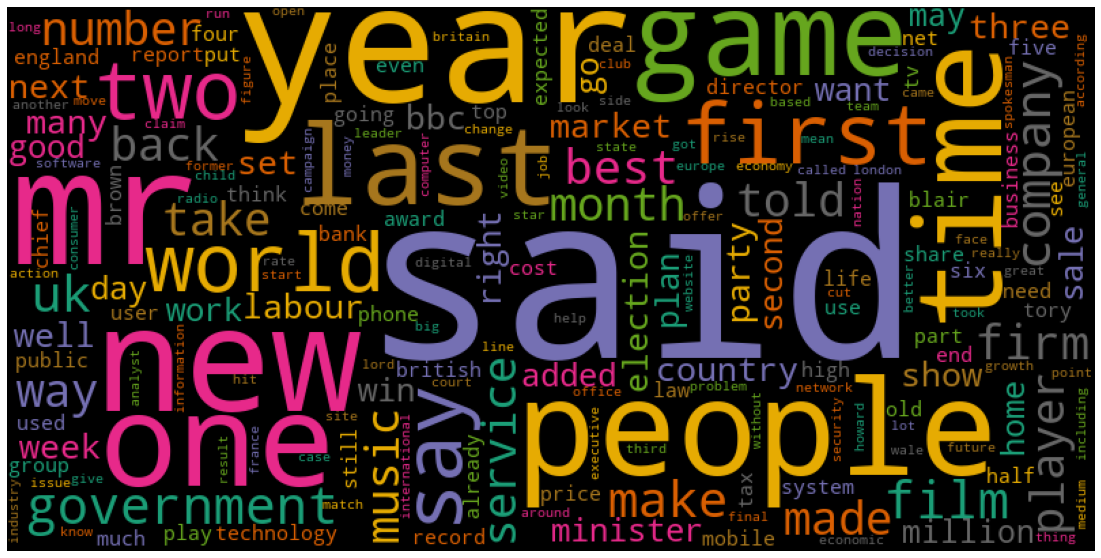

In [282]:
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud)
plt.axis("off")

In [283]:
if 'i' in sw:
  print(True)
else:
  print(False)

True


In [284]:
temp.value_counts()[:20]

said          26113
year          12011
mr            11069
would          9337
also           7807
people         7362
new            7179
one            7073
time           5945
game           5531
could          5466
last           5030
first          4944
two            4647
say            4586
world          4464
government     4332
film           4252
uk             4026
company        3988
dtype: int64

In [285]:
from collections import Counter
counts = Counter(temp)
print(counts.most_common(10))

[('said', 26113), ('year', 12011), ('mr', 11069), ('would', 9337), ('also', 7807), ('people', 7362), ('new', 7179), ('one', 7073), ('time', 5945), ('game', 5531)]


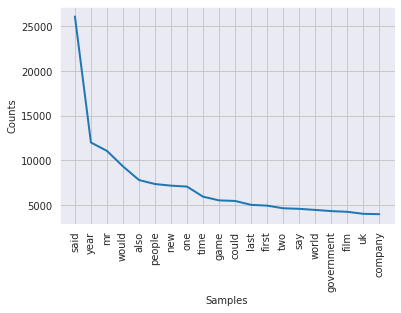

In [286]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(temp)
nlp_words.plot(20);

In [288]:
#text = ' '.join(copydata1['text1'])
#text

In [289]:
copydata1['text1']= copydata['text1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
copydata1['text2']= copydata['text2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [290]:
def replacespaces(x,space,second):
  result = x.replace(space, second)
  return result
copydata1['text1']= copydata['text1'].apply(lambda x: replacespaces(x,'  ',' '))
copydata1['text2']= copydata['text2'].apply(lambda x: replacespaces(x,'  ',' '))

#copydata1['text1']= copydata['text1'].apply(lambda x: replacespaces(x,' ',''))

In [291]:
print(copydata1['text1'][0])

savvy searchers fail to spot ads internet search engine users are an odd mix of naive and sophisticated suggests a report into search habits  the report by the us pew research center reveals that 87 of searchers usually find what they were looking for when using a search engine it also shows that few can spot the difference between paid for results and organic ones the report reveals that 84 of net users say they regularly use google ask jeeves msn and yahoo when online  almost 50 of those questioned said they would trust search engines much less if they knew information about who paid for results was being hidden according to figures gathered by the pew researchers the average users spends about 43 minutes per month carrying out 34 separate searches and looks at 1 9 webpages for each hunt a significant chunk of net users 36  carry out a search at least weekly and 29 of those asked only look every few weeks for 44 of those questioned the information they are looking for is critical to 

In [292]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc)
x = bow_converter.fit_transform(copydata1['text1'])
words = bow_converter.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [293]:
len(words)

38

In [294]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [310]:
jaccard_similarity(copydata1['text1'][0],copydata1['text2'][0])

0.9459459459459459

In [296]:
copydata1['text1'][0]

'savvy searchers fail to spot ads internet search engine users are an odd mix of naive and sophisticated suggests a report into search habits  the report by the us pew research center reveals that 87 of searchers usually find what they were looking for when using a search engine it also shows that few can spot the difference between paid for results and organic ones the report reveals that 84 of net users say they regularly use google ask jeeves msn and yahoo when online  almost 50 of those questioned said they would trust search engines much less if they knew information about who paid for results was being hidden according to figures gathered by the pew researchers the average users spends about 43 minutes per month carrying out 34 separate searches and looks at 1 9 webpages for each hunt a significant chunk of net users 36  carry out a search at least weekly and 29 of those asked only look every few weeks for 44 of those questioned the information they are looking for is critical to

In [297]:
copydata1['text2'][0]

'newcastle 2 1 bolton kieron dyer smashed home the winner to end bolton s 10 game unbeaten run  lee bowyer put newcastle ahead when he fed stephen carr on the right flank then sprinted into the area to power home a header from the resultant cross wanderers hit back through stelios giannakopoulos who ended a fluid passing move with a well struck volley but dyer had the last word in a game of few chances pouncing on a loose ball after alan shearer s shot was blocked and firing into the top corner neither side lacked urgency in the early stages of the game with plenty of tackles flying in but opportunities in front of goal were harder to come by bolton keeper jussi jaaskelainen had to make two saves in quick succession midway through the first half  keeping out shearer s low shot and dyer s close range header  but that was the only goalmouth action of note and it was almost out of nothing that the magpies took the lead on 35 minutes bowyer found space with a neat turn on the half way line

Vector Methods

In [306]:
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

print(cosine_sim(copydata1['text1'][0],copydata1['text2'][0]))

0.04935791741588822


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [ ]:
#def cos_similarity(x,y):
#  """ return cosine similarity between two lists """
 
 # numerator = sum(a*b for a,b in zip(x,y))
 # denominator = squared_sum(x)*squared_sum(y)
 # return round(numerator/float(denominator),3)

#cos_similarity(copydata1['text1'][0], copydata1['text2'][0][1])

In [309]:
print(nlp(copydata1['text1'][0]).similarity(nlp(copydata1['text2'][0])))

0.7518971637490103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.


In [321]:
print(nlp("ride").similarity(nlp("bike")))

0.6237710131529614


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.
